In [1]:
%matplotlib inline
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import itertools
from ipywidgets import interact

In [2]:
def ode(state, t, a=3, epsilon=1, omega=1, r0=1, alpha=-.2, beta=.2):
    
    x1 = state[0]
    y1 = state[1]
    x2 = state[2]
    y2 = state[3]

    dx1 =  y1
    dy1 =  -epsilon*(y1**2 - omega**2 * r0**2) * y1 \
        - a * x1 + (y1 - y2) * (alpha + beta * (x1 - x2) * (x1 - x2))
    dx2 = y2
    dy2 =  -epsilon*(y2**2 - omega**2 * r0**2) * y2 \
        - a * x2 + (y2 - y1) * (alpha + beta * (x2 - x1) * (x2 - x1))

    return [dx1, dy1, dx2, dy2]

In [3]:
t = np.arange(0, 40, .01) # Times
# ic = [2,0,-2,0] # In phase
ic = [.5,0,0,-1] # Anti-phase
orbit = odeint(ode, ic, t) ### Run the system  

In [4]:
def plot_f(a, epsilon, omega,r0,alpha,beta):
    # ic = [x1,y1,x2,y2]
    orbit = odeint(ode, ic, t, args = (a,epsilon,omega,r0,alpha,beta,)) ### Run the system  
    plt.plot(t, orbit[:,0], label="finger 1"); # x1
    plt.plot(t, orbit[:,2], label="finger 2"); # x2    
    plt.xlabel("time")
    plt.legend()

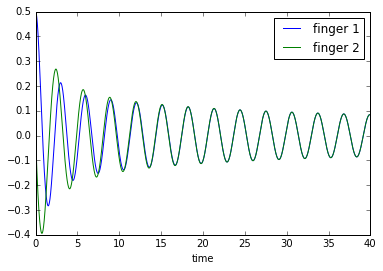

In [5]:
interact(plot_f, a = [0.1,7,.01], epsilon=[0,2,.01], omega=[0,1,.1], r0=[0,2,.01], alpha=[-.4,-.1,.01], beta=[.1,.2,.01],)

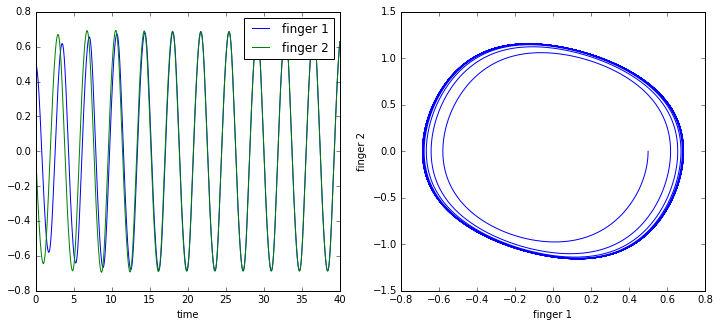

In [366]:
plt.subplot(1,2,1)
plt.plot(t, orbit[:,0], label="finger 1"); # x1
# plt.plot(t, orbit[:,1]); # y1
plt.plot(t, orbit[:,2], label="finger 2"); # x2
# plt.plot(t, orbit[:,3]); # y2
plt.xlabel("time")
plt.legend()
plt.subplot(1,2,2)
plt.plot(orbit[:,0], orbit[:,1]);
plt.xlabel("finger 1")
plt.ylabel("finger 2")
    
fig = plt.gcf()
fig.set_size_inches(12, 5)

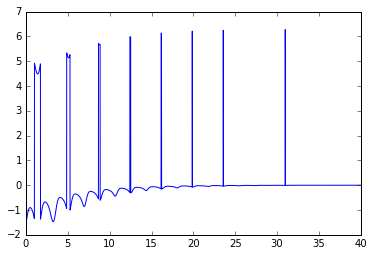

In [367]:
# Relative phase
phi1 = np.arctan2(.5 * orbit[:,1], .5 * orbit[:,0])
phi2 = np.arctan2(.5 * orbit[:,3], .5 * orbit[:,2])
# plt.plot(t,phi1)
# plt.plot(t,phi2)
phi = phi2-phi1
plt.plot(t,phi);